In [50]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler

# load the dataset
df = pd.read_csv("test.csv")

# check the first few rows
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [51]:
print("Missing values:\n", df.isnull().sum())
print("\nNumber of duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()

Missing values:
 Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction           

In [52]:
print(df.columns.tolist())

df = df.drop(columns=['Unnamed: 0', 'id'])

print(df.columns.tolist())

df_new = df.copy()


['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']
['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']


In [53]:
# fill missing 'Arrival Delay in Minutes' column values with the mean value 
df_new['Arrival Delay in Minutes'] = df_new['Arrival Delay in Minutes'].fillna(df_new['Arrival Delay in Minutes'].mean()) 

# Gender: Female = 1, Male = 0
df_new['Gender'] = df_new['Gender'].replace({'Female': 1, 'Male': 0}).astype(int)
# print(df_new['Gender'].head(10).to_list())

# Customer Type: Loyal Customer = 1, disoyal Customer = 0
df_new['Customer Type'] = df_new['Customer Type'].replace({'Loyal Customer': 1, 'disloyal Customer': 0}).astype(int)
# print(df_new['Customer Type'].head(10).to_list())

# Type of Travel: Business travel = 1, Personal Travel = 0
df_new['Type of Travel'] = df_new['Type of Travel'].replace({'Business travel': 1, 'Personal Travel': 0}).astype(int)
# print(df_new['Type of Travel'].head(30).to_list())

# satisfaction: satisfied = 1, neutral or dissatisfied = 0
df_new['satisfaction'] = df_new['satisfaction'].replace({'satisfied': 1, 'neutral or dissatisfied': 0}).astype(int)
# print(df_new['satisfaction'].head(30).to_list())

# Class: Business = (1, 0), Eco = (0, 1), Other = (0, 0)
df_new['Class Business'] = (df_new['Class'] == 'Business').astype(int)
df_new['Class Eco'] = (df_new['Class'] == 'Eco').astype(int)
df_new = df_new.drop(columns=['Class'])
# print(df_new.columns.tolist())



/var/folders/tm/rnl8gc8x2y76s1t75s3d6mrm0000gn/T/ipykernel_1831/1467562738.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_new['Gender'] = df_new['Gender'].replace({'Female': 1, 'Male': 0}).astype(int)
/var/folders/tm/rnl8gc8x2y76s1t75s3d6mrm0000gn/T/ipykernel_1831/1467562738.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_new['Customer Type'] = df_new['Customer Type'].replace({'Loyal Customer': 1, 'disloyal Customer': 0}).astype(int)
/var/folders/tm/rnl8gc8x2y76s1t75s3d6mrm0000gn/T/ipykernel_1831/1467562738.py:13: F

In [ ]:
# scale numeric features 
scaler = StandardScaler()
y = df_new['satisfaction']
X = df_new.drop(columns=['satisfaction'])
X_scaled = scaler.fit_transform(X)

In [56]:
# split into training, validation, and test sets 
from sklearn.model_selection import train_test_split
# training data 80%, testing data 20%
X_train, X_testing, y_train, y_testing = train_test_split(X_scaled, y, train_size=0.8, random_state=42, shuffle=True)
# validation and test data is 10% each
X_val, X_test, y_val, y_test = train_test_split(X_testing, y_testing, train_size=0.5, random_state=42, shuffle=True)

In [60]:
# print(df_new.columns.tolist())
print(X_train[:20])

[[ 0.98593202  0.47603968  1.8750118  -1.50743517 -0.52749278 -2.04046047
   0.62164094 -1.95111359 -0.76209981  1.34034786  1.28242204  0.41723532
  -1.01455585 -1.08080722 -2.54024532 -0.53823824 -0.24751653 -1.39689295
  -0.21695197 -0.38228641 -0.39354257 -0.9627357   1.11636981]
 [-1.01426871 -2.10066521 -0.70172986  0.66337845 -0.20906761  0.2061275
  -0.0305297   0.17214266  0.0178657   0.58930433 -0.19303782  0.41723532
   0.47990687  1.25917014 -0.26551378  1.16171635  1.32814563  1.14406253
   0.54102306 -0.32884254 -0.39354257  1.03870668 -0.89576051]
 [-1.01426871  0.47603968 -0.70172986  0.66337845  1.51223071 -0.54273516
  -0.68270034  0.17214266 -0.76209981  0.58930433  0.54469211  0.41723532
   1.22713822 -0.30081477  0.49273006  0.31173905  0.54031455 -0.54990779
   0.54102306 -0.32884254 -0.15326596  1.03870668 -0.89576051]
 [ 0.98593202  0.47603968 -2.02313583 -1.50743517  1.046609   -1.29159781
   1.27381157 -1.24336151 -1.54206532 -1.66382626 -1.66849767 -1.8553804

In [61]:
# store feature names
features = X.columns.to_list()
print(features)

['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Class Business', 'Class Eco']


In [ ]:
# SVM Model -- this is just the linear svm using C = 1
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score 

# baseline svm using linear kernal and C = 1
# train the model using training data
base_svm = SVC(kernel='linear', C=1.0, random_state=42)
base_svm.fit(X_train, y_train)

# predict using training data
y_train_hat = base_svm.predict(X_train)

# predict using validation data
y_val_hat = base_svm.predict(X_val)

# accuracy
train_accuracy = accuracy_score(y_train, y_train_hat)
val_accuracy = accuracy_score(y_val, y_val_hat)

print('Training Accuracy = {0:f}'.format(train_accuracy))
print('Validation Accuracy = {0:f}'.format(val_accuracy))

# precision
train_precision = precision_score(y_train, y_train_hat)
val_precision = precision_score(y_val, y_val_hat)

print('Training Precision = {0:f}'.format(train_precision))
print('Validation Precision = {0:f}'.format(val_precision))

# recall
train_recall = recall_score(y_train, y_train_hat)
val_recall = recall_score(y_val, y_val_hat)

print('Training Recall = {0:f}'.format(train_recall))
print('Validation Recall = {0:f}'.format(val_recall))


Training Accuracy = 0.875313
Validation Accuracy = 0.871440
Training Precision = 0.879819
Validation Precision = 0.865932
Training Recall = 0.830310
Validation Recall = 0.833775


In [ ]:
train_accuracy_list = []
val_accuracy_list = []
train_precision_list = []
val_precision_list = []
train_recall_list = []
val_recall_list = []

c_vals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] # using C = 1000 is super slow (took ~45 mins) for linear svm

for c in c_vals:
    print('C Value: {0:}'.format(c))

    base_svm = SVC(kernel='linear', C=c, random_state=42)
    base_svm.fit(X_train, y_train)

    # predict using training data
    y_train_hat = base_svm.predict(X_train)

    # predict using validation data
    y_val_hat = base_svm.predict(X_val)

    # accuracy
    train_accuracy = accuracy_score(y_train, y_train_hat)
    train_accuracy_list.append(train_accuracy)
    val_accuracy = accuracy_score(y_val, y_val_hat)
    val_accuracy_list.append(val_accuracy)

    print('Training Accuracy = {0:f}'.format(train_accuracy))
    print('Validation Accuracy = {0:f}'.format(val_accuracy))

    # precision
    train_precision = precision_score(y_train, y_train_hat)
    train_precision_list.append(train_precision)
    val_precision = precision_score(y_val, y_val_hat)
    val_precision_list.append(val_precision)

    print('Training Precision = {0:f}'.format(train_precision))
    print('Validation Precision = {0:f}'.format(val_precision))

    # recall
    train_recall = recall_score(y_train, y_train_hat)
    train_recall_list.append(train_recall)
    val_recall = recall_score(y_val, y_val_hat)
    val_recall_list.append(val_recall)

    print('Training Recall = {0:f}'.format(train_recall))
    print('Validation Recall = {0:f}'.format(val_recall))


C Value: 0.0001
Training Accuracy = 0.859817
Validation Accuracy = 0.854119
Training Precision = 0.875889
Validation Precision = 0.862235
Training Recall = 0.794253
Validation Recall = 0.791335
C Value: 0.001
Training Accuracy = 0.873340
Validation Accuracy = 0.870670
Training Precision = 0.881644
Validation Precision = 0.870457
Training Recall = 0.822880
Validation Recall = 0.825818
C Value: 0.01
Training Accuracy = 0.875072
Validation Accuracy = 0.871440
Training Precision = 0.880897
Validation Precision = 0.867959
Training Recall = 0.828344
Validation Recall = 0.831123
C Value: 0.1
Training Accuracy = 0.875746
Validation Accuracy = 0.871440
Training Precision = 0.880737
Validation Precision = 0.865932
Training Recall = 0.830310
Validation Recall = 0.833775
C Value: 1
Training Accuracy = 0.875313
Validation Accuracy = 0.871440
Training Precision = 0.879819
Validation Precision = 0.865932
Training Recall = 0.830310
Validation Recall = 0.833775
C Value: 10
Training Accuracy = 0.875409


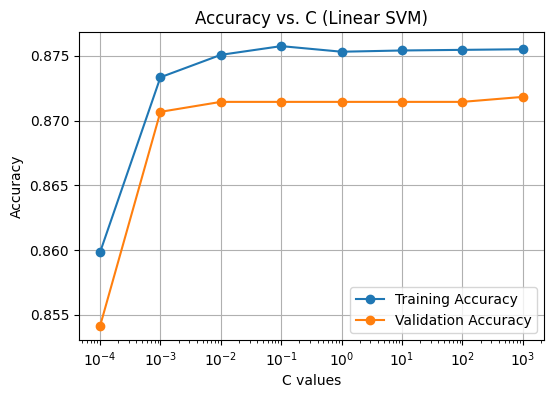

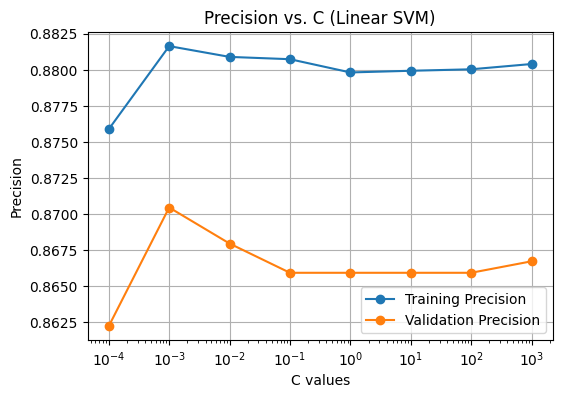

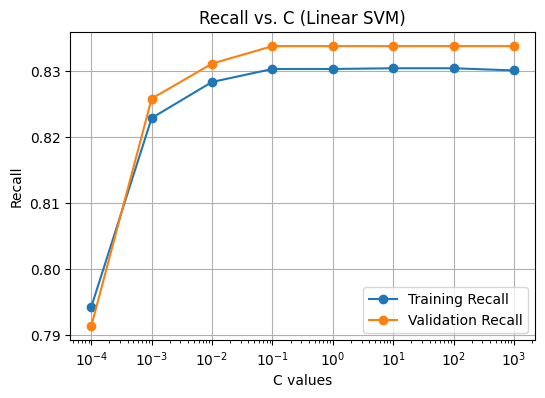

In [86]:
# plot accuracy
plt.figure(figsize=(6, 4))
plt.plot(c_vals, train_accuracy_list, marker='o', label='Training Accuracy')
plt.plot(c_vals, val_accuracy_list, marker='o', label='Validation Accuracy')
plt.xscale('log') # to space values out
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. C (Linear SVM)')
plt.grid()
plt.legend()
plt.show()

# plot precision
plt.figure(figsize=(6, 4))
plt.plot(c_vals, train_precision_list, marker='o', label='Training Precision')
plt.plot(c_vals, val_precision_list, marker='o', label='Validation Precision')
plt.xscale('log') # to space values out
plt.xlabel('C values')
plt.ylabel('Precision')
plt.title('Precision vs. C (Linear SVM)')
plt.grid()
plt.legend()
plt.show()

# plot recall
plt.figure(figsize=(6, 4))
plt.plot(c_vals, train_recall_list, marker='o', label='Training Recall')
plt.plot(c_vals, val_recall_list, marker='o', label='Validation Recall')
plt.xscale('log') # to space values out
plt.xlabel('C values')
plt.ylabel('Recall')
plt.title('Recall vs. C (Linear SVM)')
plt.grid()
plt.legend()
plt.show()

In [75]:
# SVM with polynomial kernel using degree 3
train_accuracy_list_p2 = []
val_accuracy_list_p2 = []
train_precision_list_p2 = []
val_precision_list_p2 = []
train_recall_list_p2 = []
val_recall_list_p2 = []

c_vals_p2 = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

for c in c_vals_p2:
    print('C Value: {0:}'.format(c))

    # train polynomail kernal with degree 2
    svm_p2 = SVC(kernel='poly', degree=2, C=c, random_state=42)
    svm_p2.fit(X_train, y_train)

    y_train_hat_p2 = svm_p2.predict(X_train)
    y_val_hat_p2 = svm_p2.predict(X_val)

    # accuracy
    train_accuracy_p2 = accuracy_score(y_train, y_train_hat_p2)
    train_accuracy_list_p2.append(train_accuracy_p2)
    val_accuracy_p2 = accuracy_score(y_val, y_val_hat_p2)
    val_accuracy_list_p2.append(val_accuracy_p2)

    print('Training Accuracy = {0:f}'.format(train_accuracy_p2))
    print('Validation Accuracy = {0:f}'.format(val_accuracy_p2))

    # precision 
    train_precision_p2 = precision_score(y_train, y_train_hat_p2, zero_division=0) # in case of division by 0
    train_precision_list_p2.append(train_precision_p2)
    val_precision_p2 = precision_score(y_val, y_val_hat_p2, zero_division=0)
    val_precision_list_p2.append(val_precision_p2)

    print('Training Precision = {0:f}'.format(train_precision_p2))
    print('Validation Precision = {0:f}'.format(val_precision_p2))

    # recall
    train_recall_p2 = recall_score(y_train, y_train_hat_p2)
    train_recall_list_p2.append(train_recall_p2)
    val_recall_p2 = recall_score(y_val, y_val_hat_p2)
    val_recall_list_p2.append(val_recall_p2)

    print('Training Recall = {0:f}'.format(train_recall_p2))
    print('Validation Recall = {0:f}'.format(val_recall_p2))



C Value: 0.0001
Training Accuracy = 0.559577
Validation Accuracy = 0.564665
Training Precision = 0.000000
Validation Precision = 0.000000
Training Recall = 0.000000
Validation Recall = 0.000000
C Value: 0.001
Training Accuracy = 0.560635
Validation Accuracy = 0.565820
Training Precision = 1.000000
Validation Precision = 1.000000
Training Recall = 0.002404
Validation Recall = 0.002653
C Value: 0.01
Training Accuracy = 0.832964
Validation Accuracy = 0.824480
Training Precision = 0.941964
Validation Precision = 0.935484
Training Recall = 0.661495
Validation Recall = 0.641026
C Value: 0.1
Training Accuracy = 0.914629
Validation Accuracy = 0.915704
Training Precision = 0.926573
Validation Precision = 0.930189
Training Recall = 0.875546
Validation Recall = 0.871795
C Value: 1
Training Accuracy = 0.929163
Validation Accuracy = 0.927637
Training Precision = 0.931558
Validation Precision = 0.922870
Training Recall = 0.905704
Validation Recall = 0.909814
C Value: 10
Training Accuracy = 0.934456


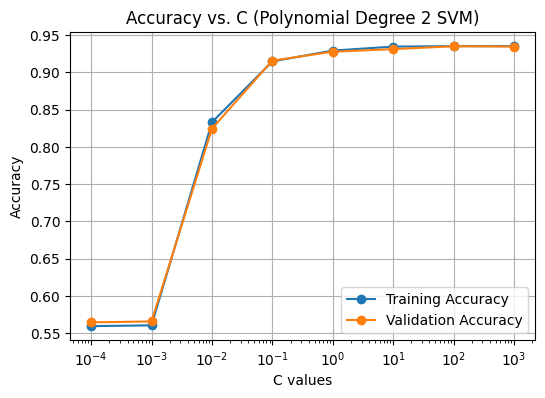

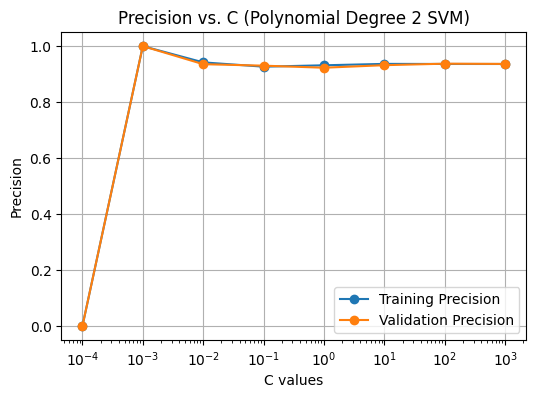

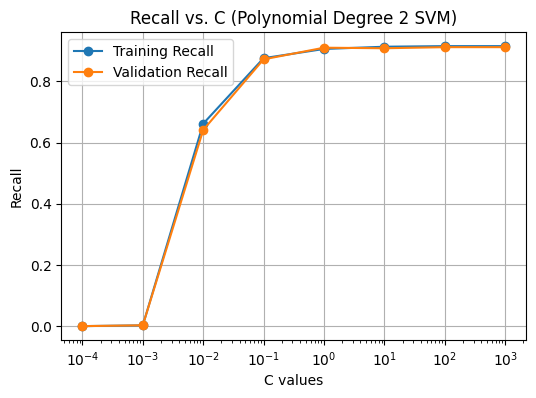

In [87]:
# plot accuracy
plt.figure(figsize=(6, 4))
plt.plot(c_vals_p2, train_accuracy_list_p2, marker='o', label='Training Accuracy')
plt.plot(c_vals_p2, val_accuracy_list_p2, marker='o', label='Validation Accuracy')
plt.xscale('log') # to space values out
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. C (Polynomial Degree 2 SVM)')
plt.grid()
plt.legend()
plt.show()

# plot precision
plt.figure(figsize=(6, 4))
plt.plot(c_vals_p2, train_precision_list_p2, marker='o', label='Training Precision')
plt.plot(c_vals_p2, val_precision_list_p2, marker='o', label='Validation Precision')
plt.xscale('log') # to space values out
plt.xlabel('C values')
plt.ylabel('Precision')
plt.title('Precision vs. C (Polynomial Degree 2 SVM)')
plt.grid()
plt.legend()
plt.show()

# plot recall
plt.figure(figsize=(6, 4))
plt.plot(c_vals_p2, train_recall_list_p2, marker='o', label='Training Recall')
plt.plot(c_vals_p2, val_recall_list_p2, marker='o', label='Validation Recall')
plt.xscale('log') # to space values out
plt.xlabel('C values')
plt.ylabel('Recall')
plt.title('Recall vs. C (Polynomial Degree 2 SVM)')
plt.grid()
plt.legend()
plt.show()

In [73]:
# SVM with polynomial kernel using degree 3
train_accuracy_list_p3 = []
val_accuracy_list_p3 = []
train_precision_list_p3 = []
val_precision_list_p3 = []
train_recall_list_p3 = []
val_recall_list_p3 = []

c_vals_p3 = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

for c in c_vals_p3:
    print('C Value: {0:}'.format(c))

    # train polynomail kernal with degree 3
    svm_p3 = SVC(kernel='poly', degree=3, C=c, random_state=42)
    svm_p3.fit(X_train, y_train)

    y_train_hat_p3 = svm_p3.predict(X_train)
    y_val_hat_p3 = svm_p3.predict(X_val)

    # accuracy
    train_accuracy_p3 = accuracy_score(y_train, y_train_hat_p3)
    train_accuracy_list_p3.append(train_accuracy_p3)
    val_accuracy_p3 = accuracy_score(y_val, y_val_hat_p3)
    val_accuracy_list_p3.append(val_accuracy_p3)

    print('Training Accuracy = {0:f}'.format(train_accuracy_p3))
    print('Validation Accuracy = {0:f}'.format(val_accuracy_p3))

    # precision 
    train_precision_p3 = precision_score(y_train, y_train_hat_p3, zero_division=0)
    train_precision_list_p3.append(train_precision_p3)
    val_precision_p3 = precision_score(y_val, y_val_hat_p3, zero_division=0)
    val_precision_list_p3.append(val_precision_p3)

    print('Training Precision = {0:f}'.format(train_precision_p3))
    print('Validation Precision = {0:f}'.format(val_precision_p3))

    # recall
    train_recall_p3 = recall_score(y_train, y_train_hat_p3)
    train_recall_list_p3.append(train_recall_p3)
    val_recall_p3 = recall_score(y_val, y_val_hat_p3)
    val_recall_list_p3.append(val_recall_p3)

    print('Training Recall = {0:f}'.format(train_recall_p3))
    print('Validation Recall = {0:f}'.format(val_recall_p3))

C Value: 0.0001
Training Accuracy = 0.559625
Validation Accuracy = 0.564665
Training Precision = 1.000000
Validation Precision = 0.000000
Training Recall = 0.000109
Validation Recall = 0.000000
C Value: 0.001
Training Accuracy = 0.648171
Validation Accuracy = 0.652040
Training Precision = 0.996226
Validation Precision = 0.995633
Training Recall = 0.201923
Validation Recall = 0.201592
C Value: 0.01
Training Accuracy = 0.878056
Validation Accuracy = 0.868745
Training Precision = 0.950082
Validation Precision = 0.941834
Training Recall = 0.763221
Validation Recall = 0.744474
C Value: 0.1
Training Accuracy = 0.917565
Validation Accuracy = 0.908006
Training Precision = 0.941484
Validation Precision = 0.923954
Training Recall = 0.866696
Validation Recall = 0.859416
C Value: 1
Training Accuracy = 0.941723
Validation Accuracy = 0.924557
Training Precision = 0.949813
Validation Precision = 0.929293
Training Recall = 0.916084
Validation Recall = 0.894783
C Value: 10
Training Accuracy = 0.960828


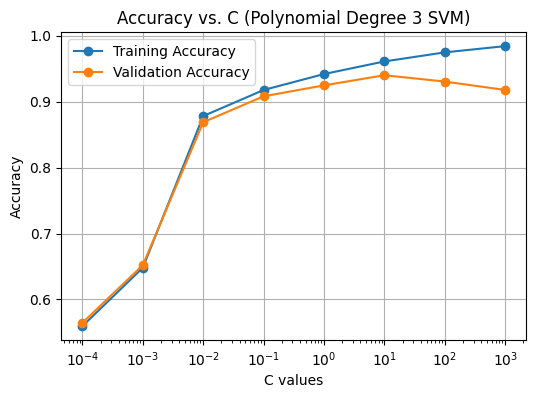

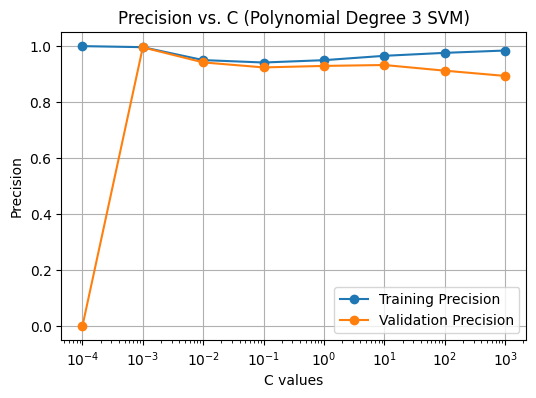

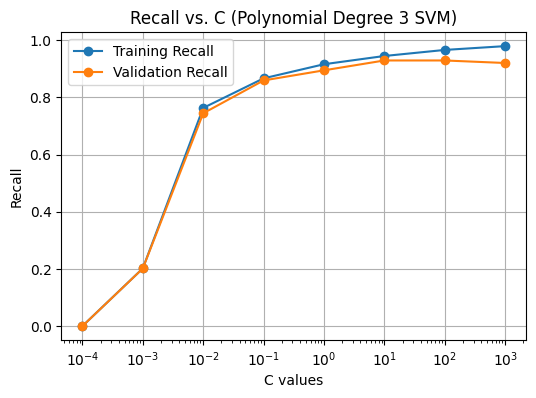

In [88]:
# plot accuracy
plt.figure(figsize=(6, 4))
plt.plot(c_vals_p3, train_accuracy_list_p3, marker='o', label='Training Accuracy')
plt.plot(c_vals_p3, val_accuracy_list_p3, marker='o', label='Validation Accuracy')
plt.xscale('log') # to space values out
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. C (Polynomial Degree 3 SVM)')
plt.grid()
plt.legend()
plt.show()

# plot precision
plt.figure(figsize=(6, 4))
plt.plot(c_vals_p3, train_precision_list_p3, marker='o', label='Training Precision')
plt.plot(c_vals_p3, val_precision_list_p3, marker='o', label='Validation Precision')
plt.xscale('log') # to space values out
plt.xlabel('C values')
plt.ylabel('Precision')
plt.title('Precision vs. C (Polynomial Degree 3 SVM)')
plt.grid()
plt.legend()
plt.show()

# plot recall
plt.figure(figsize=(6, 4))
plt.plot(c_vals_p3, train_recall_list_p3, marker='o', label='Training Recall')
plt.plot(c_vals_p3, val_recall_list_p3, marker='o', label='Validation Recall')
plt.xscale('log') # to space values out
plt.xlabel('C values')
plt.ylabel('Recall')
plt.title('Recall vs. C (Polynomial Degree 3 SVM)')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# SVM with rbf kernel
train_accuracy_list_rbf = []
val_accuracy_list_rbf = []
train_precision_list_rbf = []
val_precision_list_rbf = []
train_recall_list_rbf = []
val_recall_list_rbf = []

c_vals_rbf = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

for c in c_vals_rbf:
    print('C Value: {0:}'.format(c))

    # train rbf model
    svm_rbf = SVC(kernel='rbf', C=c, random_state=42) # using the default gamma value (gamma=scale)
    svm_rbf.fit(X_train, y_train)

    y_train_hat_rbf = svm_rbf.predict(X_train)
    y_val_hat_rbf = svm_rbf.predict(X_val)

    # accuracy
    train_accuracy_rbf = accuracy_score(y_train, y_train_hat_rbf)
    train_accuracy_list_rbf.append(train_accuracy_rbf)
    val_accuracy_rbf = accuracy_score(y_val, y_val_hat_rbf)
    val_accuracy_list_rbf.append(val_accuracy_rbf)

    print('Training Accuracy = {0:f}'.format(train_accuracy_rbf))
    print('Validation Accuracy = {0:f}'.format(val_accuracy_rbf))

    # precision 
    train_precision_rbf = precision_score(y_train, y_train_hat_rbf, zero_division=0)
    train_precision_list_rbf.append(train_precision_rbf)
    val_precision_rbf = precision_score(y_val, y_val_hat_rbf, zero_division=0)
    val_precision_list_rbf.append(val_precision_rbf)

    print('Training Precision = {0:f}'.format(train_precision_rbf))
    print('Validation Precision = {0:f}'.format(val_precision_rbf))

    # recall
    train_recall_rbf = recall_score(y_train, y_train_hat_rbf)
    train_recall_list_rbf.append(train_recall_rbf)
    val_recall_rbf = recall_score(y_val, y_val_hat_rbf)
    val_recall_list_rbf.append(val_recall_rbf)

    print('Training Recall = {0:f}'.format(train_recall_rbf))
    print('Validation Recall = {0:f}'.format(val_recall_rbf))

C Value: 0.0001
Training Accuracy = 0.559577
Validation Accuracy = 0.564665
Training Precision = 0.000000
Validation Precision = 0.000000
Training Recall = 0.000000
Validation Recall = 0.000000
C Value: 0.001
Training Accuracy = 0.816362
Validation Accuracy = 0.818322
Training Precision = 0.933117
Validation Precision = 0.930719
Training Recall = 0.628059
Validation Recall = 0.629531
C Value: 0.01
Training Accuracy = 0.888547
Validation Accuracy = 0.884527
Training Precision = 0.934971
Validation Precision = 0.925281
Training Recall = 0.802775
Validation Recall = 0.799293
C Value: 0.1
Training Accuracy = 0.929885
Validation Accuracy = 0.923788
Training Precision = 0.940268
Validation Precision = 0.932345
Training Recall = 0.897837
Validation Recall = 0.889478
C Value: 1
Training Accuracy = 0.955486
Validation Accuracy = 0.943418
Training Precision = 0.959352
Validation Precision = 0.941652
Training Recall = 0.938702
Validation Recall = 0.927498
C Value: 10
Training Accuracy = 0.978008


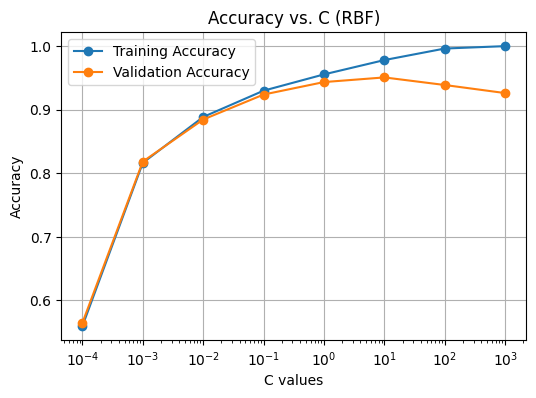

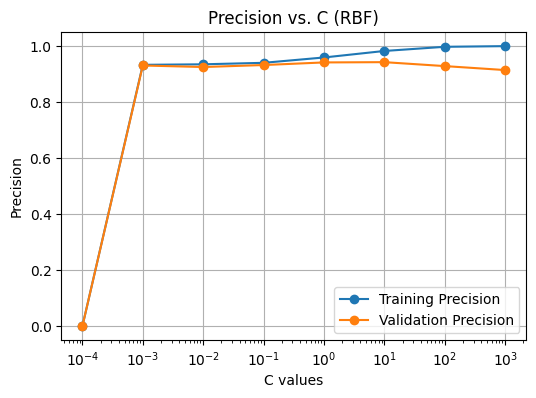

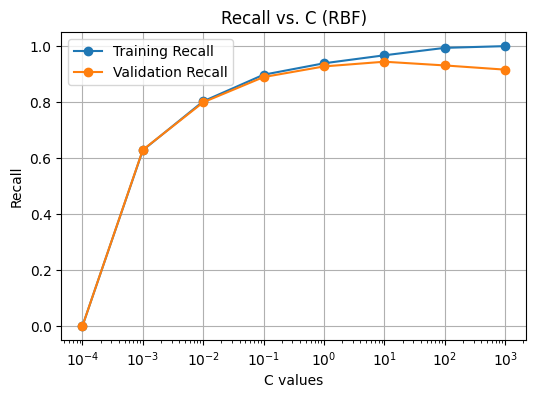

In [89]:
# plot accuracy
plt.figure(figsize=(6, 4))
plt.plot(c_vals_rbf, train_accuracy_list_rbf, marker='o', label='Training Accuracy')
plt.plot(c_vals_rbf, val_accuracy_list_rbf, marker='o', label='Validation Accuracy')
plt.xscale('log') # to space values out
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. C (RBF)')
plt.grid()
plt.legend()
plt.show()

# plot precision
plt.figure(figsize=(6, 4))
plt.plot(c_vals_rbf, train_precision_list_rbf, marker='o', label='Training Precision')
plt.plot(c_vals_rbf, val_precision_list_rbf, marker='o', label='Validation Precision')
plt.xscale('log') # to space values out
plt.xlabel('C values')
plt.ylabel('Precision')
plt.title('Precision vs. C (RBF)')
plt.grid()
plt.legend()
plt.show()

# plot recall
plt.figure(figsize=(6, 4))
plt.plot(c_vals_rbf, train_recall_list_rbf, marker='o', label='Training Recall')
plt.plot(c_vals_rbf, val_recall_list_rbf, marker='o', label='Validation Recall')
plt.xscale('log') # to space values out
plt.xlabel('C values')
plt.ylabel('Recall')
plt.title('Recall vs. C (RBF)')
plt.grid()
plt.legend()
plt.show()